In [2]:
#!pip install pandasql
import pandas as pd
import pandasql as ps
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_columns = None   #display all columns in jupyter

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
main1=pd.read_csv('Performance left join jockey and trainers and horse infor.csv')
main1.head()

,Unnamed: 0,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,actual_weight,declared_horse_weight,draw,lbw,running_position,win_odds,class,going,track,prize,location,distance_m,finish_time,finish_time_s,J_Win,J_Win_perc,J_2nd,J_2nd_perc,J_3rd,J_3rd_perc,J_4th,J_4th_perc,J_5th,J_5th_perc,J_ttl_rides,J_stakes_won,T_Win,T_Win_perc,T_2nd,T_2nd_perc,T_3rd,T_3rd_perc,T_4th,T_4th_perc,T_5th,T_5th_perc,T_ttl_runs,T_stakes_won,H_id,H_name,H_country,H_age,H_colour,H_sex,H_ImportType,H_season_stakes,H_ttl_stakes,H_no_of_1_2_3_Starts,H_no_of_starts_in_past10,H_curr_location,H_arr_date,H_trainer,H_owner,H_curr_rating,H_1920rating,H_sire,H_dam,H_damSire
0,0,1,1,2019-09-01 00:00:00.000,1,C127,3,GOOD RUNNERS WAY,Z Purton,C S Shum,131.0,1072.0,6,0.00,"['3', '3', '2', '1']",2.2,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.480,95.48,147,21,101,14,100,14,56,8,66,9,707,"202,112,646",45,9,49,10,26,5,39,8,43,9,475,"69,711,815",C127,GOOD RUNNERS WAY,NZ,6.0,Bay,Gelding,PPG,0.0,1388520.0,"['2', '1', '2', '22']",0.0,Conghua,2020-03-04,C S Shum,Mr & Mrs Peter Chan On Tak and Robert Chan Chi...,34.0,34.0,Battle Paint,Ysa Post,Postponed
1,1,1,1,2019-09-01 00:00:00.000,2,C035,4,REGENCY GEM,J Moreira,W Y So,129.0,1179.0,7,0.10,"['9', '8', '8', '2']",4.9,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.500,95.50,138,19,123,17,91,13,68,9,66,9,719,"206,911,366",31,7,28,7,33,8,33,8,28,7,426,"35,330,615",C035,REGENCY GEM,NZ,6.0,Bay,Gelding,PPG,0.0,1016240.0,"['1', '2', '2', '19']",0.0,Hong Kong,2020-07-02,W Y So,Wendy Wong Yin Ting & Owen Cheng Ho Wang,40.0,40.0,Showcasing,The Myth,Cape Cross
2,2,1,1,2019-09-01 00:00:00.000,3,V406,7,PROUD SKY,K Teetan,L Ho,121.0,1053.0,4,0.50,"['5', '4', '3', '3']",18.0,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.570,95.57,93,13,75,10,81,11,81,11,72,10,719,"138,503,489",15,4,28,7,17,4,36,8,20,5,427,"21,136,215",V406,PROUD SKY,GB,7.0,Bay,Gelding,PP,0.0,1780625.0,"['3', '0', '1', '42']",0.0,Hong Kong,2016-06-25,L Ho,Francis Wong Shing Yick & Raymond Wong Kai Yuen,24.0,24.0,Acclamation,Claiomh Solais,Galileo
3,3,1,1,2019-09-01 00:00:00.000,4,V369,2,LE PANACHE,A Sanna,D J Whyte,132.0,1076.0,3,1.25,"['4', '6', '6', '4']",5.7,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.680,95.68,9,8,4,3,9,8,7,6,10,8,120,"10,735,300",44,9,41,9,38,8,47,10,40,9,466,"51,039,432",V369,LE PANACHE,IRE,NaN,Bay,Gelding,PP,NaN,2501500.0,"['2', '6', '5', '42']",0.0,NaN,NaN,NaN,Kok Jian Pei,NaN,38.0,Acclamation,Heavens Peak,Pivotal
4,4,1,1,2019-09-01 00:00:00.000,5,V400,1,GOLD VELVET,L Hewitson,A T Millard,133.0,1155.0,8,1.50,"['8', '7', '7', '5']",7.0,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.710,95.71,3,1,9,4,11,4,14,6,10,4,251,"7,362,155",30,9,28,8,33,10,23,7,25,7,346,"37,234,605",V400,GOLD VELVET,NZ,NaN,Bay / Brown,Gelding,PPG,NaN,2005145.0,"['2', '4', '3', '34']",0.0,NaN,NaN,NaN,"Gibson Lau Wai Chi, Eric Lau Pui Kit & Ricky L...",NaN,42.0,Savabeel,Girls On Top,O'Reilly


In [4]:
#Create table for Trainer Analysis
Trainer_WinOdd_WinPerc=main1[['win_odds','T_Win_perc','race_id','trainer']].groupby('trainer').agg({'win_odds':'mean','T_Win_perc':'mean','race_id':'count'})
Trainer_WinOdd_WinPerc.columns=['Avg_win_odds', 'Avg_Trainer_win_perc', 'Match_count']

In [5]:
#Trainer races at least 30 times
Trainer_WinOdd_WinPerc1=Trainer_WinOdd_WinPerc[Trainer_WinOdd_WinPerc['Match_count']>30]

Text(0, 0.5, 'Win Odds')

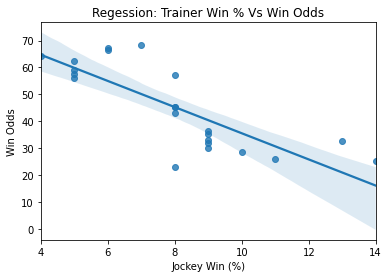

In [7]:
#Regression Plot
sns.regplot(Trainer_WinOdd_WinPerc1['Avg_Trainer_win_perc'],Trainer_WinOdd_WinPerc1['Avg_win_odds']).set_title('Regession: Trainer Win % Vs Win Odds')
plt.xlabel(r'Jockey Win (%)')
plt.ylabel('Win Odds')

In [6]:
#Regession Formula
from scipy.stats import linregress
linregress(Trainer_WinOdd_WinPerc1['Avg_Trainer_win_perc'], Trainer_WinOdd_WinPerc1['Avg_win_odds'])

LinregressResult(slope=-4.861707801836155, intercept=84.14196564095107, rvalue=-0.8002986720543143, pvalue=7.753508862353484e-06, stderr=0.8144876737864375)

In [7]:
#Use Formula to predict WinOdds
Trainer_WinOdd_WinPerc1['ExpectWinOdds']=Trainer_WinOdd_WinPerc1['Avg_Trainer_win_perc'].apply(lambda x: x*-5+85)

In [8]:
#compare WinOdds
Trainer_WinOdd_WinPerc1['Diff']=Trainer_WinOdd_WinPerc1['Avg_win_odds']-Trainer_WinOdd_WinPerc1['ExpectWinOdds']

In [9]:
#For Hit Trainers , Avg_win_odds lower than expected
a=Trainer_WinOdd_WinPerc1.sort_values(by=['Avg_Trainer_win_perc', 'Diff'], ascending=False).head()
a2=a[['Avg_Trainer_win_perc','Diff']]
a2.columns=['Trainer Win %','Estimated Win Odds agianst Public']
a2

,Trainer Win %,Estimated Win Odds agianst Public
trainer,,
P F Yiu,14,10.334519
K W Lui,13,12.758111
A S Cruz,11,-3.904515
J Moore,10,-6.354417
C S Shum,9,-3.530169


In [10]:
#List of Recommend Top 10 Jockey to bet
b=Trainer_WinOdd_WinPerc1[Trainer_WinOdd_WinPerc1['Diff']>0].sort_values(by=['Diff'], ascending=False)[0:10]
b2=b[['Avg_Trainer_win_perc','Diff']]
b2.columns=['Trainer Win %','Estimated Win Odds agianst Public']
b2

,Trainer Win %,Estimated Win Odds agianst Public
trainer,,
W Y So,7,18.475472
K W Lui,13,12.758111
T P Yung,6,12.305800
K H Ting,8,12.194903
Y S Tsui,6,11.553266
P F Yiu,14,10.334519
D E Ferraris,5,2.409133
P O'Sullivan,8,0.481867
D J Hall,8,0.150255


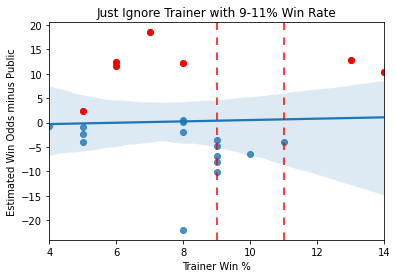

In [14]:
#Pick Trainer win percent from 9-11% 
sns.regplot(Trainer_WinOdd_WinPerc1['Avg_Trainer_win_perc'],Trainer_WinOdd_WinPerc1['Diff']).set_title('Just Ignore Trainer with 9-11% Win Rate')
plt.axvline(9,color='red',dashes=(5, 5))
plt.axvline(11,color='red',dashes=(5, 5))
plt.xlabel('Trainer Win %')
plt.ylabel('Estimated Win Odds minus Public')
df = Trainer_WinOdd_WinPerc1.query('(Avg_Trainer_win_perc <=8 | Avg_Trainer_win_perc >=10) & Diff>1')
plt.scatter(df['Avg_Trainer_win_perc'], df['Diff'],  color="red")